In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
action_value = [np.random.normal() for i in range(10)]


In [4]:
optimal_action = np.argmax(action_value)

In [5]:
T = 1000
explore  = 0.1
percent_reward_table = [[0 for i in range(2000)] for j in  range(T)]
percent_optimal_action = [[0 for i in range(2000)] for j in range(T)]
for j in range(2000):
    predicted_value = [0 for i in range(10)]
    appearance_table = [0 for i in range(10)]
    total_reward = 0
    for i in range(T):
        outcome = random.choices([0,1],weights= [explore,1-explore])[0]
        if outcome == 0:
            A = random.choice(range(10))
        else:
            A = np.argmax(predicted_value)
        R =   np.random.normal() + action_value[A]
        total_reward+=R
        appearance_table[A] +=1
        predicted_value[A] += (R - predicted_value[A])/appearance_table[A]
        percent_reward_table[i][j] = total_reward/(i+1)
        percent_optimal_action[i][j] = appearance_table[optimal_action]/(i+1)

In [6]:
average_reward_over_time = [sum(row)/2000 for row in percent_reward_table]
average_optimal_action = [sum(row)/2000 for row in percent_optimal_action]

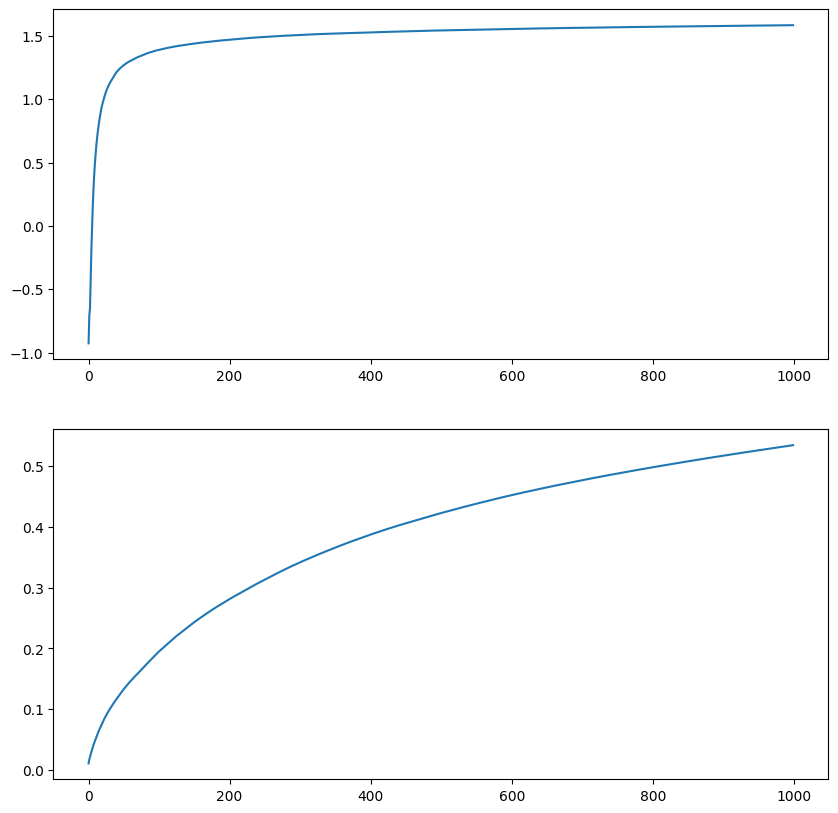

In [7]:
fig, ax = plt.subplots(2, figsize = (10,10))
ax[0].plot(average_reward_over_time)
ax[1].plot(average_optimal_action);